## Librerias

In [166]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicHermiteSpline, CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

## Punto 1

### 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

Polinomio de Lagrange:


Polinomio de Hermite:


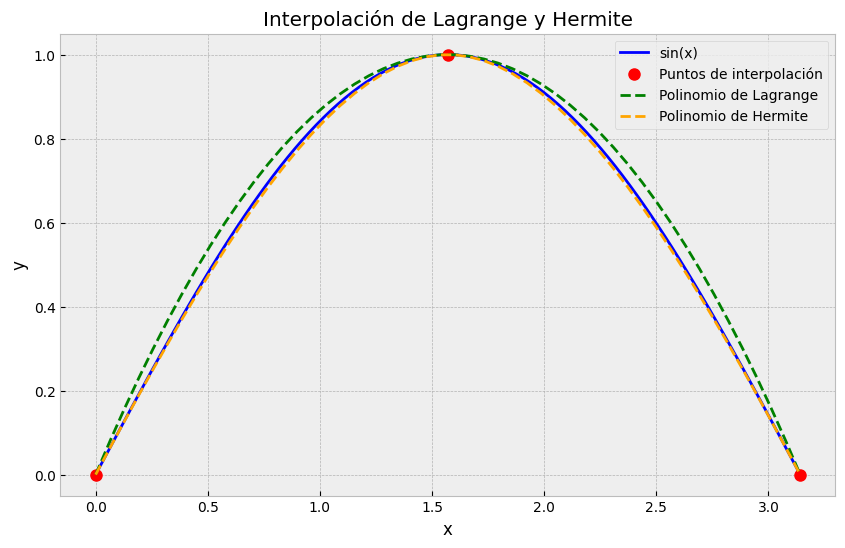

In [167]:
# Definimos la variable simbólica para trabajar con SymPy
x = sp.symbols('x') 

# Puntos de interpolación para f(x) = sin(x)
x_vals = np.array([0,np.pi/2,np.pi])
y_vals = np.array([0,1,0])

# Puntos donde se evaluarán los polinomios para graficar
x_interpolacion = np.linspace(min(x_vals),max(x_vals))

# <<<<<<<<<<<<<<<<<<<<<<<<<
# Polinomio de Lagrange
# <<<<<<<<<<<<<<<<<<<<<<<<<

# Calcula el polinomio de Lagrange usando scipy.interpolate.lagrange
P_lagrange = lagrange(x_vals, y_vals)
p=0

# Expande el polinomio de Lagrange en términos de x
for i in range(0,len(x_vals)):
    p = p + (P_lagrange[i] * (x**i))

print('Polinomio de Lagrange:')
display(sp.expand(p))

# <<<<<<<<<<<<<<<<<<<<<<<<<
# Polinomio de Hermite
# <<<<<<<<<<<<<<<<<<<<<<<<<

# Calcula la derivada de la función en los puntos de interpolación
derivada = np.cos(x_vals)

# Calcula el polinomio de Hermite usando scipy.interpolate.CubicHermiteSpline
P_hermite = CubicHermiteSpline(x_vals, y_vals, derivada)

print('Polinomio de Hermite:')
display(P_hermite)

# <<<<<<<<<<<<<<<<<<<<<<<<<
# Graficar los resultados
# <<<<<<<<<<<<<<<<<<<<<<<<<

# Generamos puntos para graficar la función original
x0=np.linspace(0,np.pi,100)
y0=np.sin(x0)

plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(x0, y0, label='sin(x)', color='blue')
plt.plot(x_vals, y_vals, 'ro', label='Puntos de interpolación', markersize=8)
plt.plot(x_interpolacion, P_lagrange(x_interpolacion), label='Polinomio de Lagrange', color='green', linestyle = '--')
plt.plot(x_interpolacion, P_hermite(x_interpolacion), label='Polinomio de Hermite', color='orange', linestyle = '--')
plt.title('Interpolación de Lagrange y Hermite')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Como podemos ver entre el polinomio de Lagrange y el de Hermite, el polinomio de Hermite es más preciso, por lo cual, se espera que el error en Hermite sea menor

Error de Lagrange:


Error de Hermite:


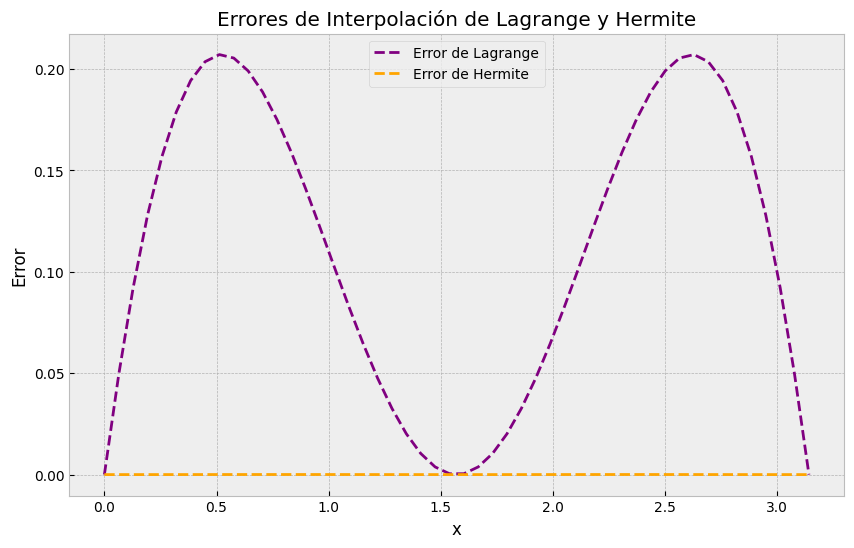

In [168]:
# <<<<<<<<<<<<<<<<<<<<<<<<<
# Cálculo del error de interpolación
# <<<<<<<<<<<<<<<<<<<<<<<<<

# Definimos los puntos de interpolación y la función original
x_vals = np.array([0,np.pi/2,np.pi])
x_interpolacion = np.linspace(min(x_vals),max(x_vals))
n = len(x_vals)

f = sp.sin(x)

# Calculamos la derivada de orden n y 2n+2 de la función original
df3 = sp.diff(f, x, n)
df = sp.diff(f, x, (2*n)+2)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Calculamos el error de interpolación de Lagrange
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

error_lagrange = (1 / sp.factorial(n)) * (df3) * (x - x_vals[0]) * (x - x_vals[1]) * (x - x_vals[2])
print('Error de Lagrange:')
display((error_lagrange))

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Calculamos el error de interpolación de Hermite
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


producto = 1
for i in range(0,n):
    producto *= ((x-(x_vals[i]))**2)
error_hermite = (df / sp.factorial(2*n+2)) * producto
print('Error de Hermite:')
display((error_hermite))

# Convertimos los errores a funciones numéricas para graficar
error_lagrange_func = sp.lambdify(x, error_lagrange)
error_hermite_func = sp.lambdify(x, error_hermite)

# Calculamos los errores en los puntos de interpolación
ylagrange = error_lagrange_func(x_interpolacion)
yhermite = error_hermite_func(x_interpolacion)

# Graficamos los errores de interpolación
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(x_interpolacion, abs(ylagrange), label='Error de Lagrange', color='purple', linestyle = '--')
plt.plot(x_interpolacion, abs(yhermite), label='Error de Hermite', color='orange', linestyle = '--')
plt.title('Errores de Interpolación de Lagrange y Hermite')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()

Como podemos observar, el error de Hermite es muy cercano a 0, en cambio, el error de Lagrange es bastante alto comparado al de Hermite

## Punto 2

### 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

Función de Breit-Wigner:


Derivada de los datos experimentales:


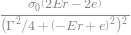

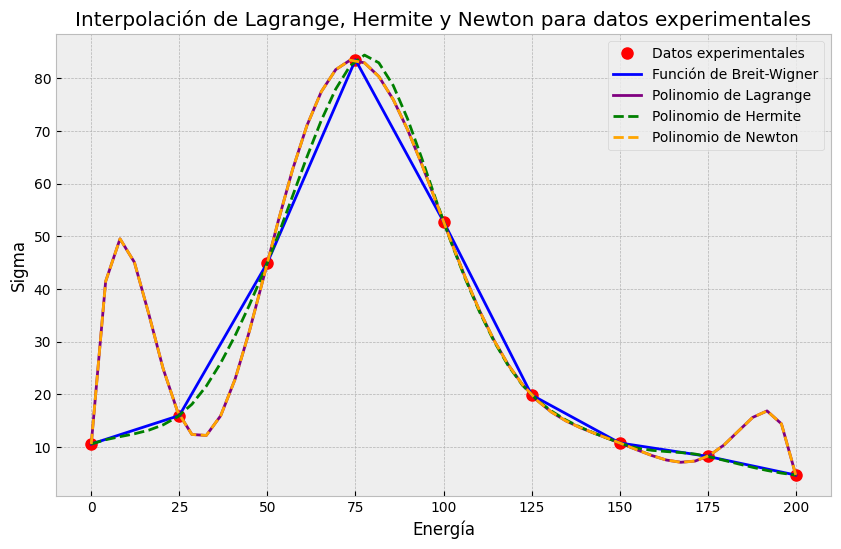

In [169]:
# Datos experimentales y parámetros de la función de Breit-Wigner
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
Er = 78
Gamma = 55

# Valores de la función de Breit-Wigner para los datos experimentales
sigma_valores= sigma_exp * ( (Energia - Er)**2 + (Gamma**2 / 4))

# Creamos un arreglo de interpolación para las energías
x_interpolacion = np.linspace(min(Energia), max(Energia))

# Definimos variables simbólicas para SymPy
e = sp.symbols('e')
sigma = sp.symbols('s')
sigma_0 = sp.symbols('sigma_0')
er = sp.symbols('Er')
gamma = sp.symbols('Gamma')

# Expresión de la función de Breit-Wigner en términos simbólicos
sigma_bw = sigma_0 / ((e - er)**2 + (gamma**2 / 4))

# Mostramos la expresión simbólica de la función de Breit-Wigner
print('Función de Breit-Wigner:')
display(sigma_bw) 

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Interpolación de Lagrange para datos experimentales
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Calculamos el polinomio de Lagrange para los datos experimentales
P_lagrange_bw = lagrange(Energia, sigma_exp)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Interpolación de Hermite para datos experimentales
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Calculamos la derivada de la función en los puntos de interpolación
derivada_bw = sp.diff(sigma_bw, e)
derivada_func = sp.lambdify((e, er, sigma_0, gamma), derivada_bw)
print('Derivada de los datos experimentales:')
display(derivada_bw)
# Calculamos la derivada en los puntos de interpolación
derivada_vals = derivada_func(Energia, Er, sigma_valores, Gamma)

P_hermite_bw = CubicHermiteSpline(Energia, sigma_exp, derivada_vals)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Interpolacion de Newton para datos experimentales
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

def diferencia_dividida(x, y, i, j):
    '''Calcula la diferencia dividida de Newton de orden (j-i) para los datos x, y.'''
    if j == i:
        return y[i]
    else:
        numerador = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        denominador = x[j] - x[i]
        return numerador / denominador

def coeficientes_newton(x, y):
    '''Calcula los coeficientes del polinomio de Newton para los datos x, y.'''
    n = len(x)
    coef = np.zeros_like(x, dtype=float)
    for j in range(n):
        coef[j] = diferencia_dividida(x, y, 0, j)
    return coef

def polinomio_newton(x, y, x_interpolacion=None):
    '''Devuelve una función evaluable del polinomio de Newton para los datos x, y.'''
    coef = coeficientes_newton(x, y)
    def P(x_val):
        resultado = coef[0]
        producto = 1
        for i in range(1, len(x)):
            producto *= (x_val - x[i - 1])
            resultado += coef[i] * producto
        return resultado
    return P

# Calculamos el polinomio de Newton para los datos experimentales
P_newton_bw = polinomio_newton(Energia, sigma_exp)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# Graficamos los resultados de las interpolaciones
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

fE = sp.lambdify((e, er, sigma_0, gamma), sigma_bw) # Convertimos la función de Breit-Wigner a una función numérica

plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(Energia, sigma_exp, 'ro', label='Datos experimentales', markersize=8)
plt.plot(Energia, fE(Energia, Er, sigma_valores, Gamma), label='Función de Breit-Wigner', color='blue')
plt.plot(x_interpolacion, P_lagrange_bw(x_interpolacion), label='Polinomio de Lagrange', color='purple', )
plt.plot(x_interpolacion, P_hermite_bw(x_interpolacion), label='Polinomio de Hermite', color='green', linestyle='--')
plt.plot(x_interpolacion, P_newton_bw(x_interpolacion), label='Polinomio de Newton', color='orange', linestyle='--')
plt.title('Interpolación de Lagrange, Hermite y Newton para datos experimentales')
plt.xlabel('Energía')
plt.ylabel('Sigma')
plt.legend()


En esta gráfica podemos observar que el polinomio de Lagrange y el de Newton son muy parecidos, incluso, visualmente en nuestra grafica son 'iguales', ademas, estos dos polinomios se encuentran bastante alejados de la funcion real si lo comparamos con el polinomio de Hermite, que tieme mayor precisión

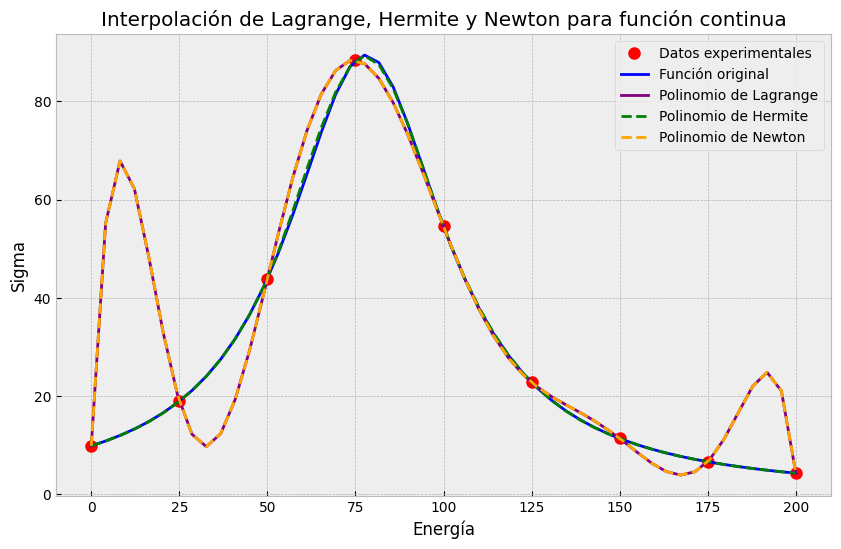

In [170]:
# Hacemos la funcion continua
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
Er = 78
Gamma = 55

# Calculamos la media de los valores de sigma
sigma_promedio = np.mean(sigma_valores)

def f_e_continua(E):
    """Función continua de Breit-Wigner con un valor promedio de sigma."""
    return sigma_promedio / ((E - Er)**2 + (Gamma**2 / 4))

y = f_e_continua(Energia)
derivada_continua = derivada_func(Energia, Er, sigma_promedio, Gamma)
x_interpolacion = np.linspace(min(Energia), max(Energia))

# Calculamos el polinomio de Hermite, Lagrange y Newton para la función continua
P_hermite_continua = CubicHermiteSpline(Energia, y, derivada_continua)
P_lagrange_continua = lagrange(Energia, y)
P_newton_continua = polinomio_newton(Energia, y, x_interpolacion)

plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(Energia, y, 'ro', label='Datos experimentales', markersize=8)
plt.plot(x_interpolacion, f_e_continua(x_interpolacion), label='Función original', color='blue')
plt.plot(x_interpolacion, P_lagrange_continua(x_interpolacion), label='Polinomio de Lagrange', color='purple')
plt.plot(x_interpolacion, P_hermite_continua(x_interpolacion), label='Polinomio de Hermite', color='green', linestyle='--')
plt.plot(x_interpolacion, P_newton_continua(x_interpolacion), label='Polinomio de Newton', color='orange', linestyle='--')
plt.title('Interpolación de Lagrange, Hermite y Newton para función continua')
plt.xlabel('Energía')
plt.ylabel('Sigma')
plt.legend()


Esto lo hacemos para simular la función, y poder ver de una manera más clara como se vería esta función con 'infinitos puntos', asi logramos una curva mas suave. Ahora, podemos confirmar que el polinomio Hermite es el que mas se acerca a la función original he incluso hay intervalos en los que en la grafica se superponen

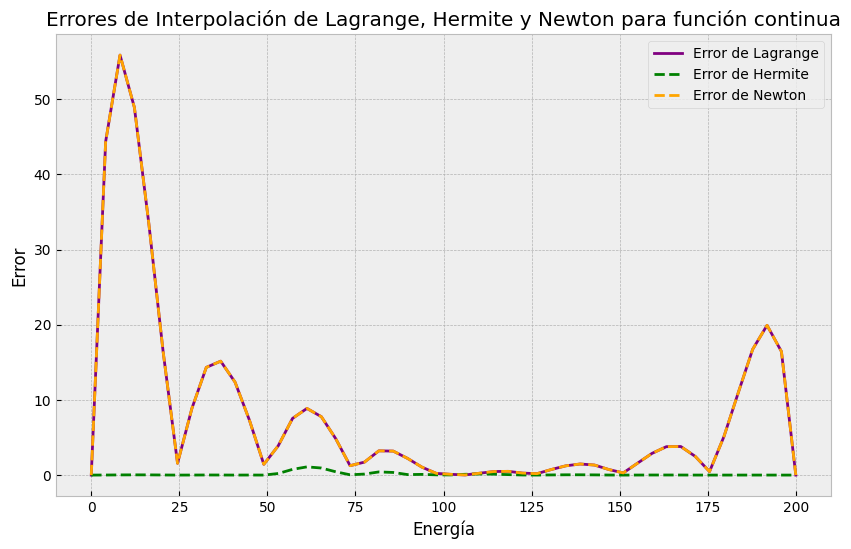

In [171]:
# Ahora vamos a calcular el error de interpolación para la función continua

error_lagrange_continua = abs(f_e_continua(x_interpolacion) - P_lagrange_continua(x_interpolacion))
error_hermite_continua = abs(f_e_continua(x_interpolacion) - P_hermite_continua(x_interpolacion))
error_newton_continua = abs(f_e_continua(x_interpolacion) - P_newton_continua(x_interpolacion))

# Graficamos los errores de interpolación para la función continua
plt.style.use('bmh')
plt.figure(figsize=(10, 6))
plt.plot(x_interpolacion, error_lagrange_continua, label='Error de Lagrange', color='purple')
plt.plot(x_interpolacion, error_hermite_continua, label='Error de Hermite', color='green', linestyle='--')
plt.plot(x_interpolacion, error_newton_continua, label='Error de Newton', color='orange', linestyle='--')
plt.title('Errores de Interpolación de Lagrange, Hermite y Newton para función continua')
plt.xlabel('Energía')
plt.ylabel('Error')
plt.legend()

Nuevamente, volvemos a notar que el error de Hermite es muy cercano a 0 y menor que el de Newton y Lagrange, lo cual tiene sentido con las anteriores gráficas. Por otro lado, vemos que el error del polinomio de Newton y el polinomio de Lagrange son tan similares que se superponen, esto confirma nuestra observacion inicial de que son 'casi iguales'

## Punto 3

### 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

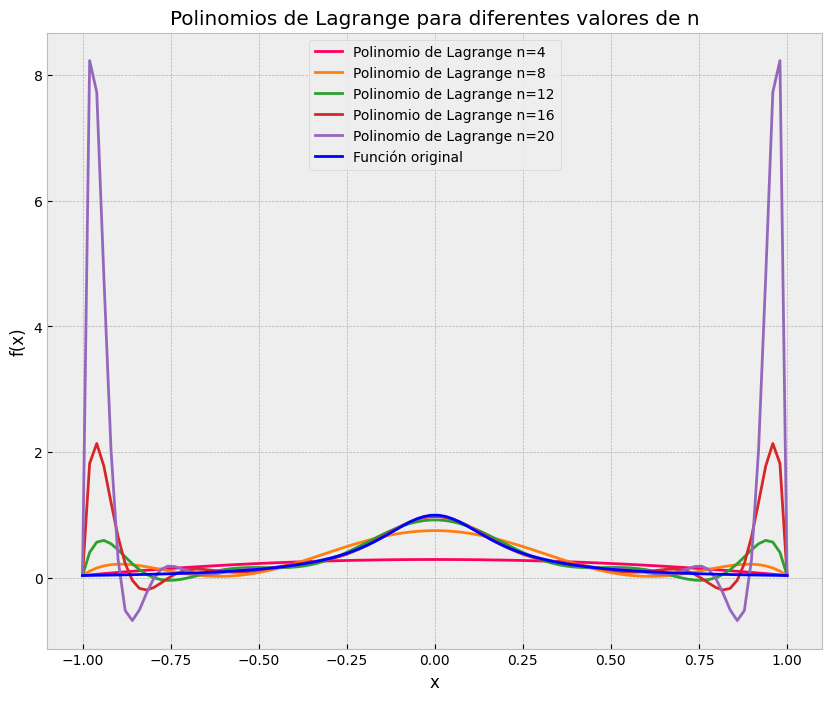

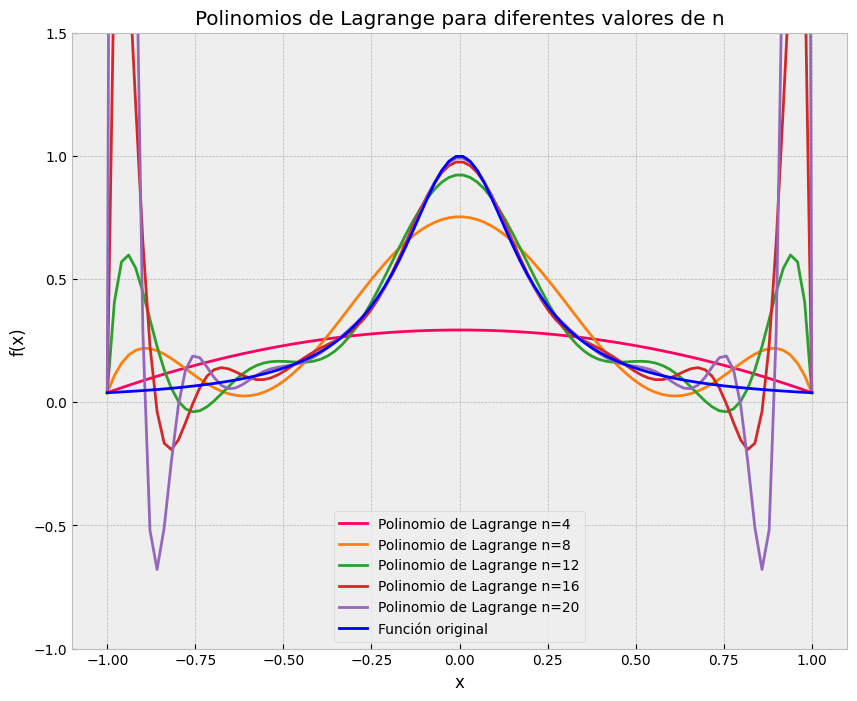

In [172]:
# Representación gráfica de la función f(x) = 1/(1+25x^2) y sus interpolaciones de Lagrange

# Definimos la función f(x) = 1/(1+25x^2)
f = lambda x: 1/ (1+25*x**2)
# Definimos los puntos de interpolación
x_interpolacion = np.linspace(-1, 1, 100)
# Definimos los colores para las curvas
colores = [
    '#ff0062', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', "#12dbdb", '#bcbd22', "#7c17cf",
]
# Diferentes valores de n para las interpolaciones
n = [4, 8, 12, 16, 20]
# Función para generar puntos de interpolación
f_4_n = lambda n: np.linspace(-1, 1, n)

# Graficamos los polinomios de Lagrange para diferentes valores de n

plt.figure(figsize=(10, 8))
for idx, i in enumerate(n):
    punto = f_4_n(i)
    c = colores[idx % len(colores)]  # Así nunca te sales del rango
    P_lagrange = lagrange(punto, f(punto))
    plt.plot(x_interpolacion, P_lagrange(x_interpolacion), label=f'Polinomio de Lagrange n={i}', color=c)

# Graficamos la función original
plt.plot(x_interpolacion, f(x_interpolacion), label='Función original', color='blue')
plt.title('Polinomios de Lagrange para diferentes valores de n')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(fontsize=10)
plt.show()

# Zoom para ver mejor los polinomios de Lagrange

plt.figure(figsize=(10, 8))
for idx, i in enumerate(n):
    punto = f_4_n(i)
    c = colores[idx % len(colores)]  # Así nunca te sales del rango
    P_lagrange = lagrange(punto, f(punto))
    plt.plot(x_interpolacion, P_lagrange(x_interpolacion), label=f'Polinomio de Lagrange n={i}', color=c)

plt.plot(x_interpolacion, f(x_interpolacion), label='Función original', color='blue')
plt.title('Polinomios de Lagrange para diferentes valores de n')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-1, 1.5)
plt.legend(fontsize=10)
plt.show()


Como podemos observar, al incrementar el numero de puntos, el polinomio empieza a tener saltos y a oscilar caoticamente en los extremos del polinomio.

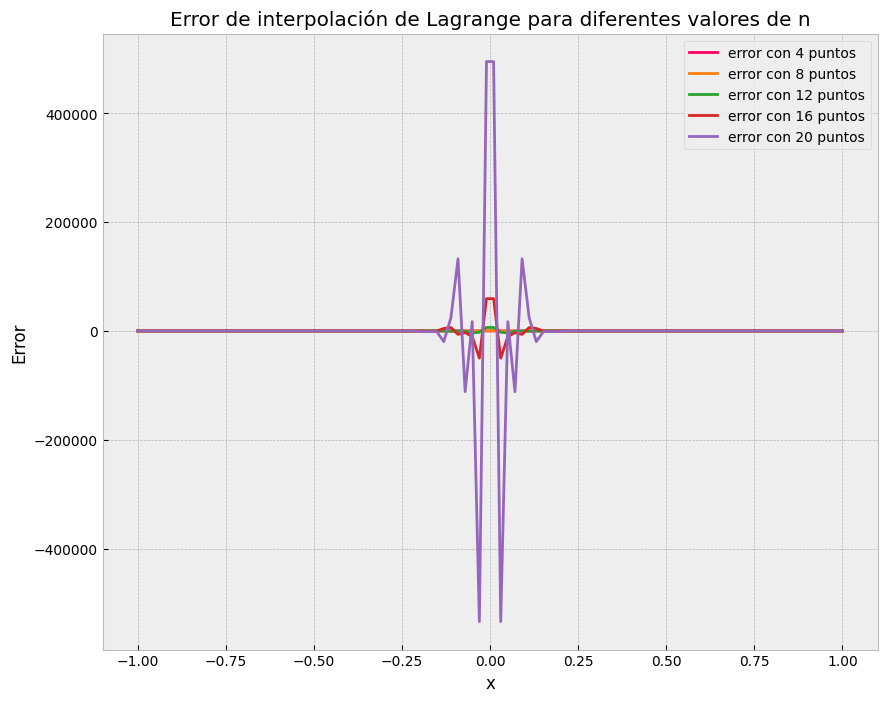

In [173]:
# Calculo y graficación del error de interpolación de Lagrange para diferentes valores de n

# Definimos la función f(x) = 1/(1+25x^2)
f = lambda x: 1/ (1+25*x**2)
# Definimos los puntos de interpolación
x_interpolacion = np.linspace(-1, 1, 100)
# Definimos los colores para las curvas
colores = [
    '#ff0062', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', "#12dbdb", '#bcbd22', "#7c17cf",
]
# Diferentes valores de n para las interpolaciones
n = [4, 8, 12, 16, 20]
# Función para generar puntos de interpolación
f_4_n = lambda n: np.linspace(-1, 1, n)

# Definimos la variable simbólica para trabajar con SymPy
x=sp.symbols('x')
f_simbol=1/(1+25*x**2) 

plt.figure(figsize=(10, 8))
for idx, j in enumerate(n):
    # Generamos los puntos de interpolación
    puntos = f_4_n(j) 
    # Definimos el color para cada curva
    c = colores[idx % len(colores)]
    # Calculamos el polinomio de Lagrange
    coef = 1
    for i in puntos:
        coef *= (x-i) 
    m1_mult = (1/sp.factorial(j)) 
    df_j=sp.diff(f_simbol,x,j)
    # Calculamos el error de interpolación
    error=m1_mult*df_j*coef
    # Convertimos el error a una función numérica para graficar
    error_l=sp.lambdify(x,error)
    # Graficamos el error para cada valor de n
    plt.plot(x_interpolacion,error_l(x_interpolacion),label=f"error con {j} puntos", color=c)
    plt.title('Error de interpolación de Lagrange para diferentes valores de n')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.legend(fontsize=10)

En la gráfica se puede apreciar lo mencionado anteriormente, entre mas puntos se utilicen, mas caotico se vuelve el polinomio, haciendo que el error sea grandisimo

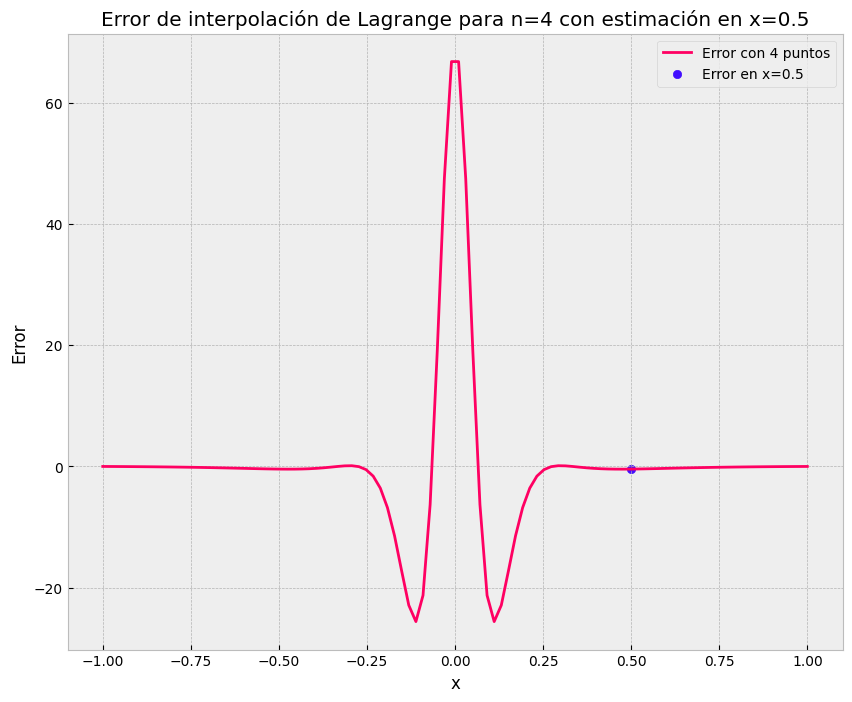

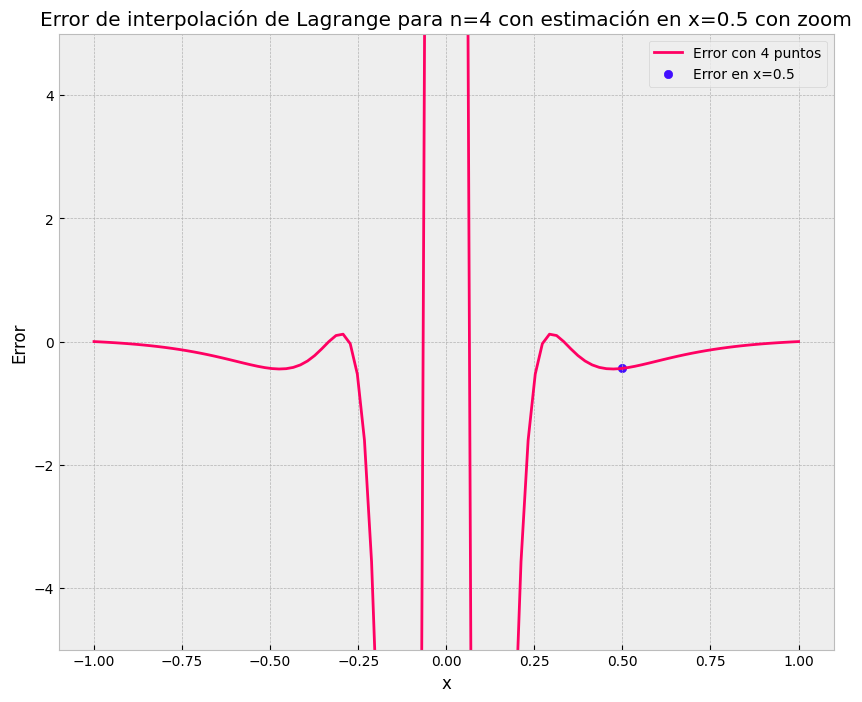

In [174]:
# Estimación del error en x=0.5 con 4 puntos de interpolación

n=[4] # Definimos n como 4 para calcular el error con 4 puntos de interpolación

plt.figure(figsize=(10, 8))
for idx, j in enumerate(n):
    # Generamos los puntos de interpolación
    puntos = f_4_n(j) 
    # Definimos el color para la curva
    c = colores[idx % len(colores)]
    coef = 1
    # Calculamos el polinomio de Lagrange
    for i in puntos:
        coef *= (x-i) 
    m1_mult = (1/sp.factorial(j)) 
    df_j=sp.diff(f_simbol,x,j)
    # Calculamos el error de interpolación
    error=m1_mult*df_j*coef
    # Convertimos el error a una función numérica para graficar
    error_l=sp.lambdify(x,error)
    # Graficamos el error
    plt.plot(x_interpolacion,error_l(x_interpolacion),label=f'Error con {j} puntos', color=c)
    plt.scatter(0.5,error_l(0.5),color = '#420eff', label='Error en x=0.5')
    plt.title('Error de interpolación de Lagrange para n=4 con estimación en x=0.5')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.legend(fontsize=10)

# Graficamos el error de interpolación de Lagrange con zoom

plt.figure(figsize=(10, 8))
for idx, j in enumerate(n):
    puntos = f_4_n(j) 
    c = colores[idx % len(colores)]
    coef = 1
    for i in puntos:
        coef *= (x-i) 
    m1_mult = (1/sp.factorial(j)) 
    df_j=sp.diff(f_simbol,x,j)
    error=m1_mult*df_j*coef
    error_l=sp.lambdify(x,error)
    plt.plot(x_interpolacion,error_l(x_interpolacion),label=f'Error con {j} puntos', color=c)
    plt.scatter(0.5,error_l(0.5),color = "#420eff", label='Error en x=0.5')
    plt.title('Error de interpolación de Lagrange para n=4 con estimación en x=0.5 con zoom')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.legend(fontsize=10)
    plt.ylim(-5,5)

In [175]:
print('El error en x=0.5 con n=4 es:', error_l(0.5))

El error en x=0.5 con n=4 es: -0.434926065494105


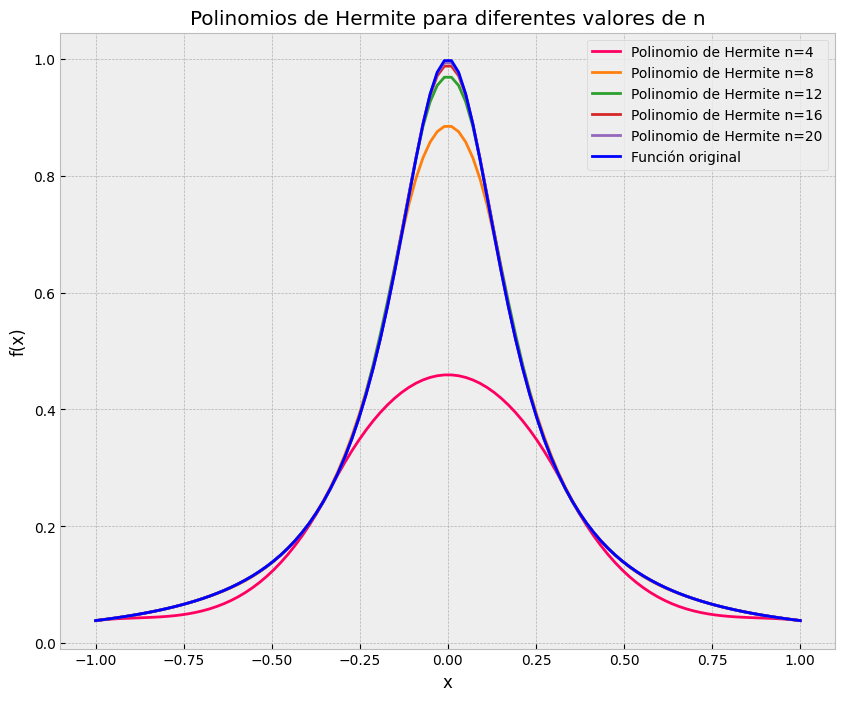

In [176]:
# AHORA VAMOS A HACER LO MISMO CON EL POLINOMIO DE HERMITE

# Definimos la función f(x) = 1/(1+25x^2)
f = lambda x: 1/ (1+25*x**2)
# Definimos los puntos de interpolación
n = [4, 8, 12, 16, 20]
# Función para generar puntos de interpolación
f_4_n = lambda n: np.linspace(-1, 1, n)
x_interpolacion = np.linspace(-1, 1, 100)

# Definimos la variable simbólica para trabajar con SymPy
x=sp.symbols('x')
f_simbol=1/(1+25*x**2) 

# Definimos la derivada de la función
derivada_simbol = sp.diff(f_simbol, x)
derivada_l = sp.lambdify(x, derivada_simbol)

plt.figure(figsize=(10, 8))
colores = [
    '#ff0062', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', "#12dbdb", '#bcbd22', "#7c17cf",
]

for idx, j in enumerate(n):
    # Generamos los puntos de interpolación
    puntos = f_4_n(j) 
    # Calculamos la derivada en los puntos de interpolación
    df_p = derivada_l(puntos)
    # Definimos el color para la curva
    c = colores[idx % len(colores)]
    # Calculamos el polinomio de Hermite
    P_hermite = CubicHermiteSpline(puntos, f(puntos), df_p)
    # Graficamos el polinomio de Hermite
    plt.plot(x_interpolacion, P_hermite(x_interpolacion), label=f'Polinomio de Hermite n={j}', color=c)
    plt.title('Polinomios de Hermite para diferentes valores de n')
    plt.xlabel('x')
    plt.ylabel('f(x)')
plt.plot(x_interpolacion, f(x_interpolacion), label='Función original', color='blue')
plt.legend(fontsize=10)



Aca podemos apreciar que el polinomio de Hermite modela con mayor precision la funcion original, y al contrario de el  polinomio de Lagrange, al aumentar el numero de puntos, el polinomio de Hermite se hace más preciso, por lo que se espera que su error vaya disminuyendo

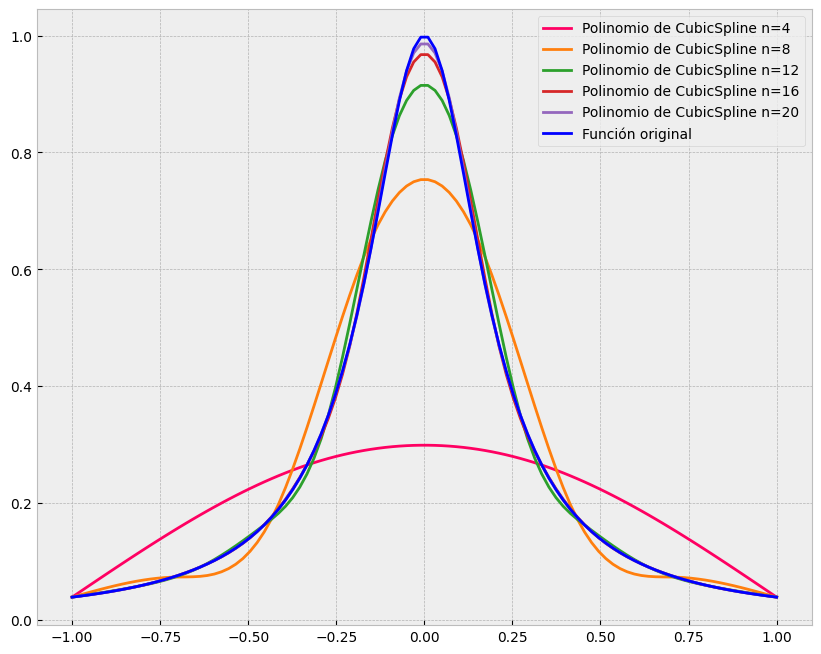

In [177]:
# AHORA CON EL CUBICSPLINE

# Definimos la función f(x) = 1/(1+25x^2)
f = lambda x: 1/ (1+25*x**2)
# Definimos los puntos de interpolación
n = [4, 8, 12, 16, 20]
# Función para generar puntos de interpolación
f_4_n = lambda n: np.linspace(-1, 1, n)
x_interpolacion = np.linspace(-1, 1, 100)
colores = [
    '#ff0062', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', "#12dbdb", '#bcbd22', "#7c17cf",
]

plt.figure(figsize=(10, 8))
for idx, i in enumerate(n):
    # Generamos los puntos de interpolación
    puntos = f_4_n(i)
    # Definimos el color para la curva
    c = colores[idx % len(colores)]
    # Calculamos el polinomio de CubicSpline
    P_cubic = CubicSpline(puntos, f(puntos), bc_type='natural')
    # Graficamos el polinomio de CubicSpline
    plt.plot(x_interpolacion, P_cubic(x_interpolacion), label=f'Polinomio de CubicSpline n={i}', color=c)
plt.plot(x_interpolacion, f(x_interpolacion), label='Función original', color='blue')
plt.legend(fontsize=10)


Podemos observar que el polinomio de CubicSplines es bastante preciso, donde, es bastante parecido al polinomio de Hermite, solo que el polinomio de hermite se hace mas 'delgado' de forma rapida, y se empieza a modelar de mejor forma desde un n bajo

## Punto 4

### 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

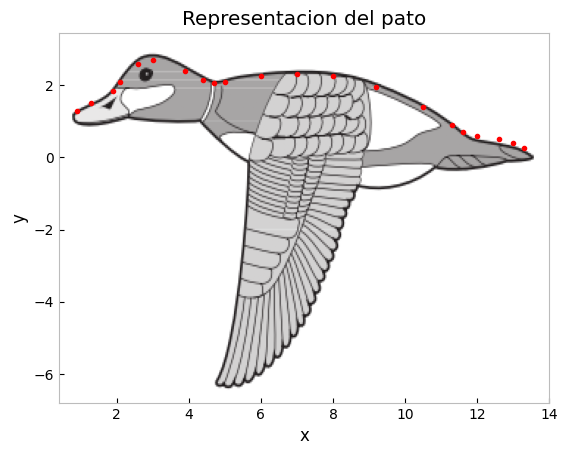

In [178]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

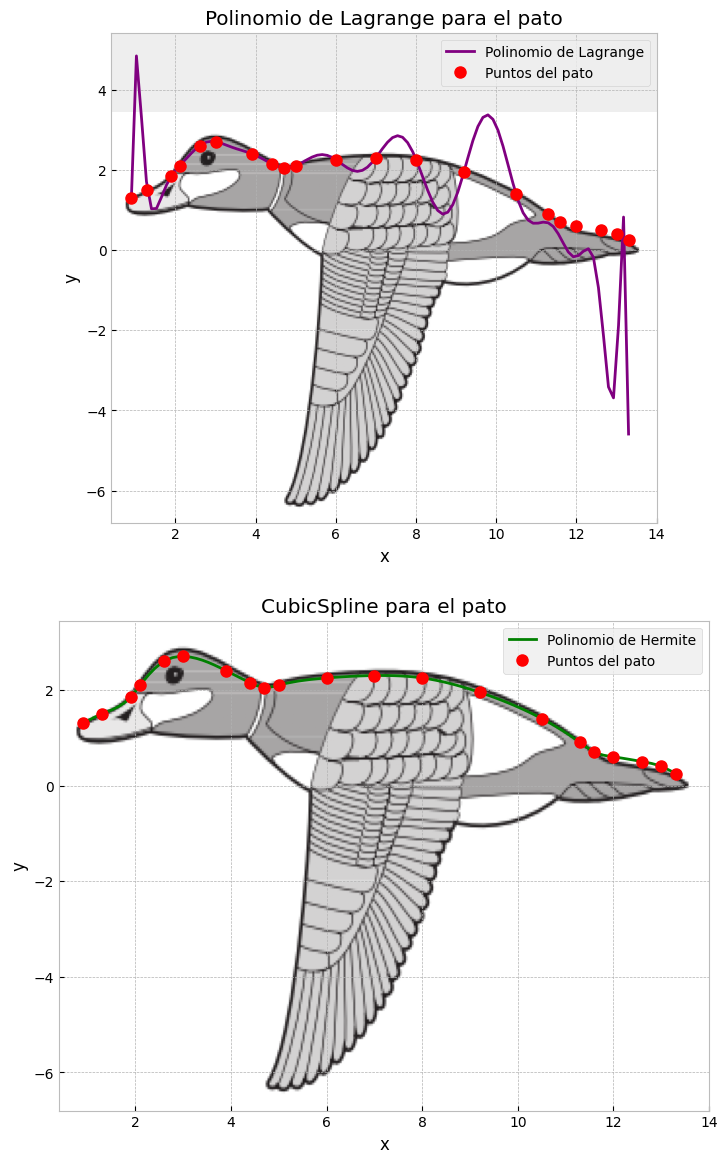

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Definimos los puntos de interpolación para el pato
x_interpolacion = np.linspace(min(xp), max(xp), 100)

# Calculamos el polinomio de Lagrange para los puntos del pato
P_lagrange_pato = lagrange(xp, yp)
ax[0].plot(x_interpolacion, P_lagrange_pato(x_interpolacion), label='Polinomio de Lagrange', color='purple')
ax[0].imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
ax[0].plot(xp, yp, 'ro', label='Puntos del pato', markersize=8)
ax[0].set_title('Polinomio de Lagrange para el pato')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# Calculamos el polinomio de CubicSplines para los puntos del pato
derivada_pato = np.gradient(yp, xp)  # Calculamos la derivada de los puntos del pato
P_hermite_pato = CubicSpline(xp, yp, bc_type='natural', extrapolate=True)
ax[1].plot(x_interpolacion, P_hermite_pato(x_interpolacion), label='Polinomio de Hermite', color='green')
ax[1].imshow(imagen_pato, extent=(0.4, 14, -6.8, 3.45))
ax[1].plot(xp, yp, 'ro', label='Puntos del pato', markersize=8)
ax[1].set_title('CubicSpline para el pato')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

Como podemos observar, el polinomio que mejor modela el pato es el polinomio de Hermite. En cambio, el polinomio de Lagrange presenta oscilaciones.
Este fenomeno se debe a que el polinomio de Lagrange generado a partir de n puntos genera un polinomio de n-1 grado, entonces al aumentar el numero de puntos, esta presentara osicilaciones. Tambien se debe tener en cuenta la distribucion de los puntos de interpolacion, puesto que esto puede causar que el polinomio de alto grado se ajuste demasiado en unas zonas y demasiado poco en otras, lo que genera grandes oscilaciones entre puntos, especialmente en los extremos. Este efecto se agrava a medida que se agregan más puntos, porque el polinomio intenta pasar exactamente por todos ellos a la vez, lo cual es matemáticamente inestable.

## Punto 5

### 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

La respuesta para x=1.5 es: 3.45


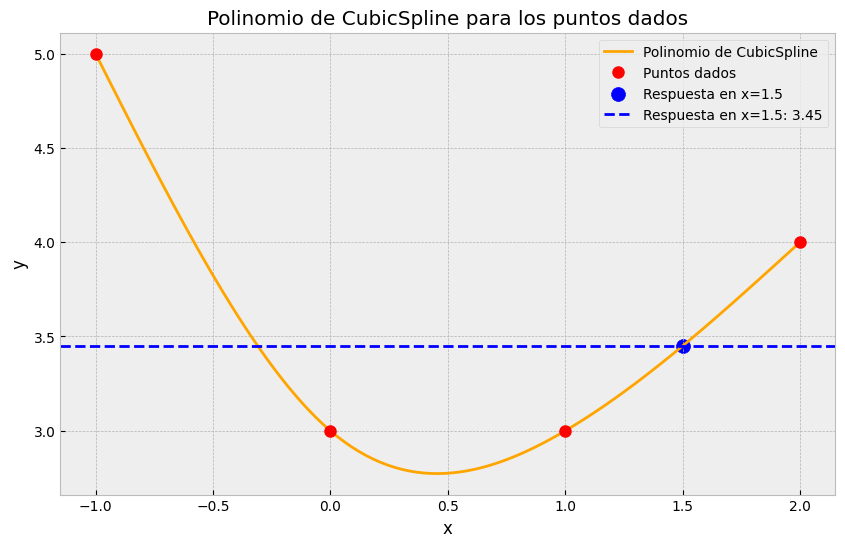

In [180]:
x = [-1, 0, 1, 2] # Puntos en x
y = [5, 3, 3, 4] # Puntos en y

# Puntos de interpolación para el polinomio de CubicSpline
x_interpolacion = np.linspace(min(x), max(x), 100)

# Calculamos con CubicSpline
P_cubic_splane = CubicSpline(x, y, bc_type='natural')

# Encontramos la respuesta para x=1.5
respuesta = P_cubic_splane(1.5)
print(f'La respuesta para x=1.5 es: {respuesta}')
# Graficamos el polinomio de CubicSpline para los puntos dados
plt.figure(figsize=(10, 6))
plt.plot(x_interpolacion, P_cubic_splane(x_interpolacion), label='Polinomio de CubicSpline', color='orange')
plt.plot(x, y, 'ro', label='Puntos dados', markersize=8)
plt.scatter(1.5, respuesta, color='blue', label='Respuesta en x=1.5', s=100)
plt.title('Polinomio de CubicSpline para los puntos dados')
plt.axhline(y=respuesta, color='blue', linestyle='--', label=f'Respuesta en x=1.5: {respuesta:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()